# LiteLLM - Benchmark Llama2, Claude1.2 and GPT3.5 for a use case
In this notebook for a given use case we run the same question and view:
* LLM Response
* Response Time
* Response Cost

## Sample output for a question
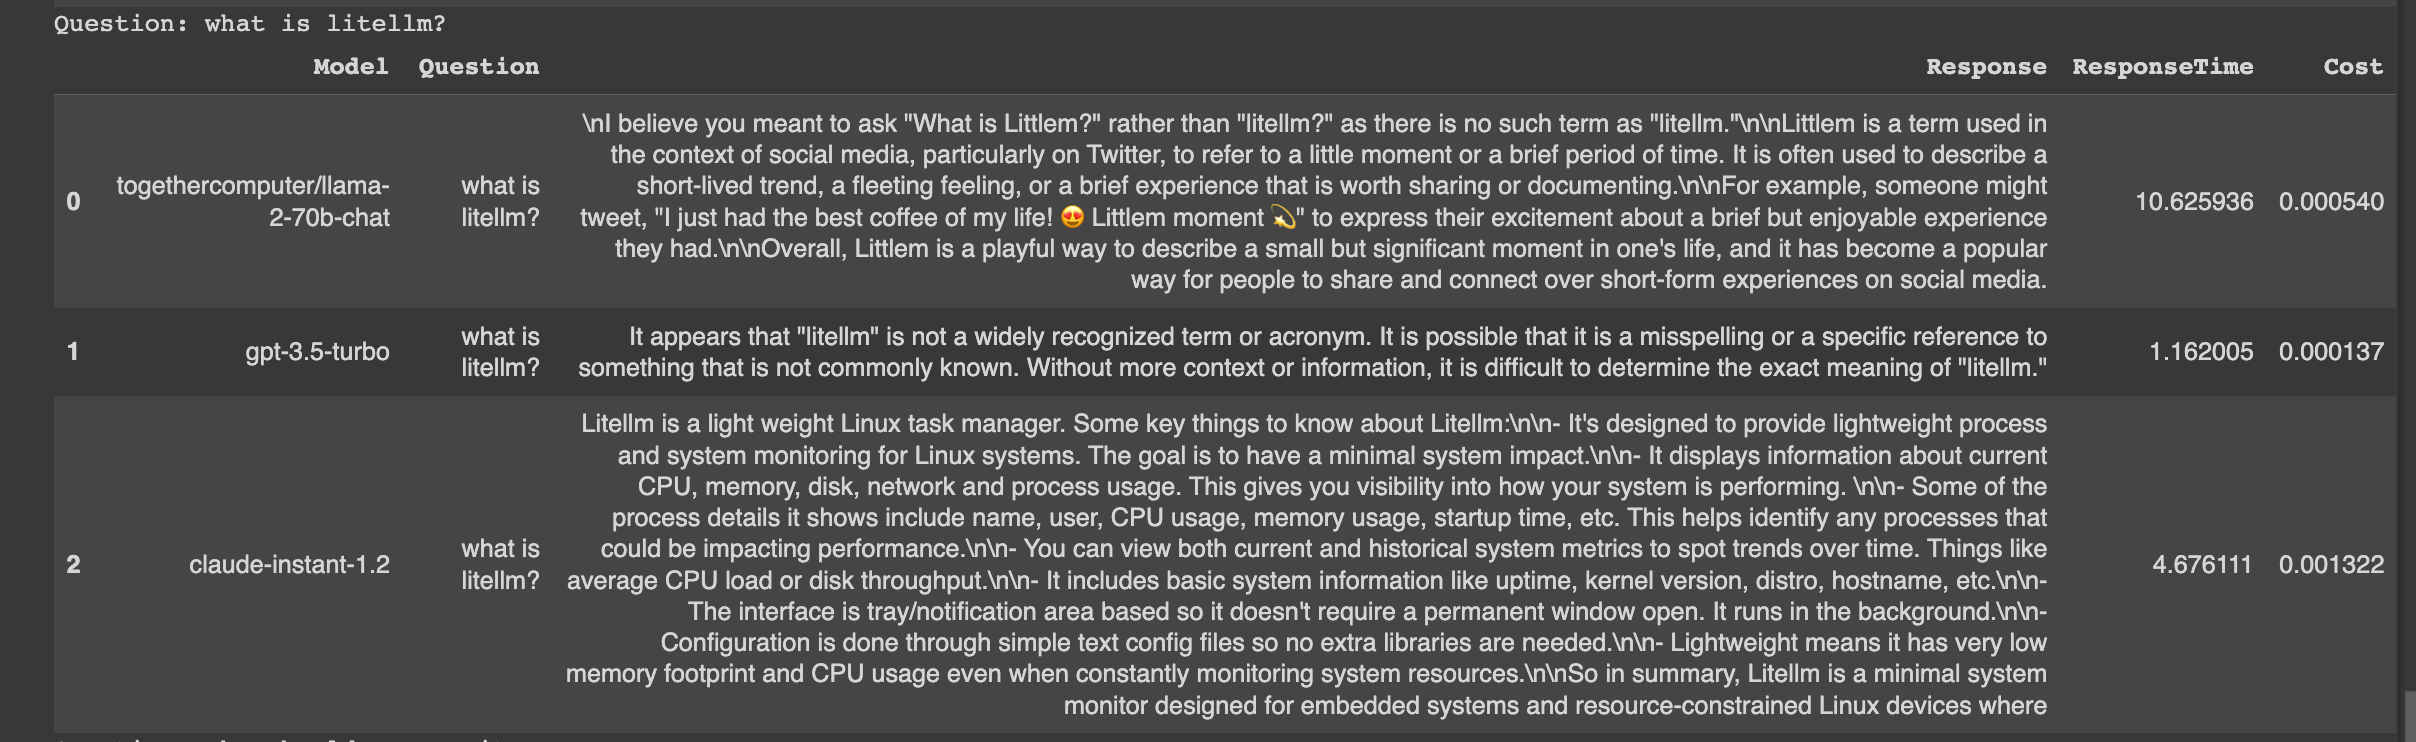

In [ ]:
!pip install litellm

## Example Use Case 1 - Code Generator
###  For this use case enter your system prompt and questions


In [21]:
# enter your system prompt if you have one
system_prompt = """
You are a coding assistant helping users using litellm.
litellm is a light package to simplify calling OpenAI, Azure, Cohere, Anthropic, Huggingface API Endpoints
--
Sample Usage:
```
pip install litellm
from litellm import completion
## set ENV variables
os.environ["OPENAI_API_KEY"] = "openai key"
os.environ["COHERE_API_KEY"] = "cohere key"
messages = [{ "content": "Hello, how are you?","role": "user"}]
# openai call
response = completion(model="gpt-3.5-turbo", messages=messages)
# cohere call
response = completion("command-nightly", messages)
```

"""


# qustions/logs you want to run the LLM on
questions = [
    "what is litellm?",
    "why should I use LiteLLM",
    "does litellm support Anthropic LLMs",
    "write code to make a litellm completion call",
]

## Running questions
### Select from 100+ LLMs here: https://docs.litellm.ai/docs/providers

In [ ]:
from litellm import completion, completion_cost
import os
import time

# optional use litellm dashboard to view logs
# litellm.use_client = True
# litellm.token = "ishaan_2@berri.ai" # set your email


# set API keys
os.environ['TOGETHERAI_API_KEY'] = ""
os.environ['OPENAI_API_KEY'] = ""
os.environ['ANTHROPIC_API_KEY'] = ""


# select LLMs to benchmark
# using https://api.together.xyz/playground for llama2
# try any supported LLM here: https://docs.litellm.ai/docs/providers

models = ['togethercomputer/llama-2-70b-chat', 'gpt-3.5-turbo', 'claude-instant-1.2']
data = []

for question in questions: # group by question
  for model in models:
    print(f"running question: {question} for model: {model}")
    start_time = time.time()
    # show response, response time, cost for each question
    response = completion(
        model=model,
        max_tokens=500,
        messages = [
            {
              "role": "system", "content": system_prompt
            },
            {
              "role": "user", "content": question
            }
        ],
    )
    end = time.time()
    total_time = end-start_time # response time
    # print(response)
    cost = completion_cost(response) # cost for completion
    raw_response = response['choices'][0]['message']['content'] # response string


    # add log to pandas df
    data.append(
        {
            'Model': model,
            'Question': question,
            'Response': raw_response,
            'ResponseTime': total_time,
            'Cost': cost
        })

## View Benchmarks for LLMs

In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import HTML
import pandas as pd

df = pd.DataFrame(data)
grouped_by_question = df.groupby('Question')

for question, group_data in grouped_by_question:
    print(f"Question: {question}")
    HTML(group_data.to_html())


Question: does litellm support Anthropic LLMs


,Model,Question,Response,ResponseTime,Cost
6,togethercomputer/llama-2-70b-chat,does litellm support Anthropic LLMs,"Yes, litellm supports Anthropic LLMs.\n\nIn the example usage you provided, the `completion` function is called with the `model` parameter set to `""gpt-3.5-turbo""` for OpenAI and `""command-nightly""` for Cohere.\n\nTo use an Anthropic LLM with litellm, you would set the `model` parameter to the name of the Anthropic model you want to use, followed by the version number, if applicable. For example:\n```\nresponse = completion(model=""anthropic-gpt-2"", messages=messages)\n```\nThis would call the Anthropic GPT-2 model to generate a completion for the given input messages.\n\nNote that you will need to set the `ANTHROPIC_API_KEY` environment variable to your Anthropic API key before making the call. You can do this by running the following command in your terminal:\n```\nos.environ[""ANTHROPIC_API_KEY""] = ""your-anthropic-api-key""\n```\nReplace `""your-anthropic-api-key""` with your actual Anthropic API key.\n\nOnce you've set the environment variable, you can use the `completion` function with the `model` parameter set to an Anthropic model name to call the Anthropic API and generate a completion.",21.513009,0.001347
7,gpt-3.5-turbo,does litellm support Anthropic LLMs,"No, currently litellm does not support Anthropic LLMs. It mainly focuses on simplifying the usage of OpenAI, Azure, Cohere, and Huggingface API endpoints.",8.656510,0.000342
8,claude-instant-1.2,does litellm support Anthropic LLMs,"Yes, litellm supports calling Anthropic LLMs through the completion function.\n\nTo use an Anthropic model with litellm:\n\n1. Set the ANTHROPIC_API_KEY environment variable with your Anthropic API key\n\n2. Pass the model name as the 'model' argument to completion(). Anthropic model names follow the format 'anthropic/<model_name>'\n\nFor example:\n\n```python \nimport os\nfrom litellm import completion\n\nos.environ[""ANTHROPIC_API_KEY""] = ""your_anthropic_api_key""\n\nmessages = [{""content"": ""Hello"", ""role"": ""user""}]\n\nresponse = completion(model=""anthropic/constitutional"", messages=messages)\n```\n\nThis would call the Constitutional AI model from Anthropic.\n\nSo in summary, litellm provides a simple interface to call any Anthropic models as long as you specify the model name correctly and set the ANTHROPIC_API_KEY env variable.",9.698195,0.001342


Question: what is litellm?


,Model,Question,Response,ResponseTime,Cost
0,togethercomputer/llama-2-70b-chat,what is litellm?,"Litellm is a lightweight Python package that simplifies calling various AI API endpoints, including OpenAI, Azure, Cohere, Anthropic, and Hugging Face. It provides a convenient interface for making requests to these APIs, allowing developers to easily integrate them into their applications. With Litellm, developers can quickly and easily interact with multiple AI models and services, without having to handle the details of authentication, API calls, and response parsing. This makes it easier to build and deploy AI-powered applications, and can help developers save time and effort.",13.479644,0.000870
1,gpt-3.5-turbo,what is litellm?,"litellm is a light package that provides a simplified interface for making API calls to various language models and APIs. It abstracts away the complexities of handling network requests, authentication, and response parsing, making it easier for developers to integrate powerful language models into their applications.\n\nWith litellm, you can quickly make API calls to models like OpenAI's GPT-3.5 Turbo, Azure's Text Analytics, Cohere's Command API, Anthropic's API, and Huggingface's models. It also supports additional functionality like conversational AI, summarization, translation, and more.\n\nBy using litellm, you can focus on your application logic without getting tangled in the details of API integration, allowing you to quickly build intelligent and conversational applications.",8.324332,0.000566
2,claude-instant-1.2,what is litellm?,"litellm is a Python library that simplifies calling various AI API endpoints like OpenAI, Azure, Cohere, Anthropic, and Huggingface. \n\nSome key things to know about litellm:\n\n- It provides a consistent interface for completing prompts and generating responses from different AI models through a single method called completion().\n\n- You specify the API (e.g. OpenAI, Cohere etc.) and model either by name or by setting environment variables before making the completion call.\n\n- This avoids having to use different SDKs or APIs for each provider and standardizes the call structure. \n\n- It handles things like setting headers, encoding inputs, parsing responses so the user doesn't have to deal with those details.\n\n- The goal is to make it easy to try different AI APIs and models without having to change code or learn different interfaces.\n\n- It's lightweight with no other dependencies required besides what's needed for each API (e.g. openai, azure SDKs etc.).\n\nSo in summary, litellm is a small library that provides a common way to interact with multiple conversational AI APIs through a single Python method, avoiding the need to directly use each provider's specific SDK.",10.316488,0.001603


Question: why should I use LiteLLM


,Model,Question,Response,ResponseTime,Cost
3,togethercomputer/llama-2-70b-chat,why should I use LiteLLM,"\nThere are several reasons why you might want to use LiteLLM:\n\n1. Simplified API calls: LiteLLM provides a simple and consistent API for calling various language models, making it easier to use multiple models and switch between them.\n2. Environment variable configuration: LiteLLM allows you to set environment variables for API keys and model names, making it easier to manage and switch between different models and APIs.\n3. Support for multiple models and APIs: LiteLLM supports a wide range of language models and APIs, including OpenAI, Azure, Cohere, Anthropic, and Hugging Face.\n4. Easy integration with popular frameworks: LiteLLM can be easily integrated with popular frameworks such as PyTorch and TensorFlow, making it easy to use with your existing codebase.\n5. Lightweight: LiteLLM is a lightweight package, making it easy to install and use, even on resource-constrained devices.\n6. Flexible: LiteLLM allows you to define your own models and APIs, making it easy to use with custom models and APIs.\n7. Extensive documentation: LiteLLM has extensive documentation, making it easy to get started and learn how to use the package.\n8. Active community: LiteLLM has an active community of developers and users, making it easy to get help and feedback on your projects.\n\nOverall, LiteLLM can help you to simplify your workflow, improve your productivity, and make it easier to work with multiple language models and APIs.",23.777885,0.001443
4,gpt-3.5-turbo,why should I use LiteLLM,"LiteLLM is a lightweight Python package that simplifies the process of making API calls to various language models. Here are some reasons why you should use LiteLLM:\n\n1. **Simplified API Calls**: LiteLLM abstracts away the complexity of making API calls to different language models. It provides a unified interface for invoking models from OpenAI, Azure, Cohere, Anthropic, Huggingface, and more.\n\n2. **Easy Integration**: LiteLLM seamlessly integrates with your existing codebase. You can import the package and start making API calls with just a few lines of code.\n\n3. **Flexibility**: LiteLLM supports a variety of language models, including GPT-3, GPT-Neo, chatGPT, and more. You can choose the model that suits your requirements and easily switch between them.\n\n4. **Convenience**: LiteLLM handles the authentication and connection details for you. You just need to set the relevant environment variables, and the package takes care of the rest.\n\n5. **Quick Prototyping**: LiteLLM is ideal for rapid prototyping and experimentation. With its simple API, you can quickly generate text, chat with models, and build interactive applications.\n\n6. **Community Support**: LiteLLM is actively maintained and supported by a community of developers. You can find help, share ideas, and collaborate with others to enhance your projects.\n\nOverall, LiteLLM simplifies the process of making API calls to language models, saving you time and effort while providing flexibility and convenience.",12.109881,0.000881
5,claude-instant-1.2,why should I use LiteLLM,"Here are some key reasons why you may want to consider using LiteLLM:\n\n- Simplifies calling multiple large language models - LiteLLM provides a unified API to call models from different providers like OpenAI, Azure, HuggingFace, Anthropic etc. This avoids having to deal with different APIs from each provider.\n\n- Easy to get started - LiteLLM is very lightweight and simple to install with just one pip install. It has minimal configuration needed with just API keys. This lowers the barrier to start experimenting with LLMs.\n\n- Standard interface - The completion API provides a standard way to send messages and get responses back regardless of underlying model. This keeps the code interface consistent. \n\n- Model agnostic - Your code doesn't need to change to switch between different models. You can easily co

Question: write code to make a litellm completion call


,Model,Question,Response,ResponseTime,Cost
9,togethercomputer/llama-2-70b-chat,write code to make a litellm completion call,"\nTo make a completion call using litellm, you can use the `completion` function from the litellm package. Here's an example of how to use it:\n```\nfrom litellm import completion\n\n# Set ENV variables\nos.environ[""OPENAI_API_KEY""] = ""your_openai_api_key""\nos.environ[""COHERE_API_KEY""] = ""your_cohere_api_key""\n\n# Define the messages to be completed\nmessages = [\n {\n ""content"": ""Hello, how are you?"",\n ""role"": ""user""\n }\n]\n\n# Make a completion call using OpenAI\nresponse = completion(model=""gpt-3.5-turbo"", messages=messages)\n\n# Make a completion call using Cohere\nresponse = completion(""command-nightly"", messages)\n```\nIn this example, we first set the ENV variables for the OpenAI and Cohere API keys. Then, we define a list of messages to be completed, which in this case contains a single message with the content ""Hello, how are you?"" and the role ""user"".\n\nNext, we make two completion calls using the `completion` function from litellm. The first call uses the OpenAI model `gpt-3.5-turbo` and passes in the list of messages. The second call uses the Cohere model `command-nightly` and passes in the same list of messages.\n\nThe `completion` function returns a response object that contains the completed messages. You can then use the `response.messages` attribute to access the completed messages.\n\nHere's an example of how to access the completed messages:\n```\n# Print the completed messages\nprint(response.messages)\n```\nThis will print the completed messages, which should look something like this:\n```\n[{'content': 'Hello, how are you?', 'role': 'user', 'completion': 'I am doing well, thanks for asking.'}]\n```\nNote that the `completion` attribute contains the completed message. You can use this attribute to retrieve the completed message and use it in your application.",32.192453,0.001821
10,gpt-3.5-turbo,write code to make a litellm completion call,"Sure! Here's an example code to make a completion call using the litellm package:\n\n```python\nfrom litellm import completion\n\n# Set the model and messages\nmodel = ""gpt-3.5-turbo""\nmessages = [\n {""role"": ""system"", ""content"": ""You are a helpful assistant.""},\n {""role"": ""user"", ""content"": ""Who won the world series in 2020?""},\n {""role"": ""assistant"", ""content"": ""The Los Angeles Dodgers won the World Series in 2020.""},\n {""role"": ""user"", ""content"": ""Where was it played?""}\n]\n\n# Make the completion call\nresponse = completion(model=model, messages=messages)\n\n# Print the assistant's reply\nassistant_reply = response[""choices""][0][""message""][""content""]\nprint(""Assistant: "", assistant_reply)\n```\n\nMake sure you have the litellm package installed (`pip install litellm`) and set the necessary environment variables for the API keys before running this code.",9.377155,0.000686
11,claude-instant-1.2,write code to make a litellm completion call,"Here is an example of making a completion call using litellm:\n\n```python\nimport os\nfrom litellm import completion\n\n# Set API keys as environment variables\nos.environ[""OPENAI_API_KEY""] = ""your openai api key"" \n\n# Conversation context \nmessages = [{\n ""content"": ""Hello, how can I help you today?"",\n ""role"": ""assistant""\n}]\n\n# Make completion call with GPT-3 model\nresponse = completion(\n model=""gpt-3.5-turbo"", \n messages=messages\n)\n\nprint(response)\n```\n\nTo break it down:\n\n- Import completion from litellm\n- Set the OPENAI_API_KEY env var \n- Define a messages list with the conversation context\n- Call completion(), specifying the model (""gpt-3.5-turbo"") and messages\n- It will return the response from the API\n- Print the response\n\nThis makes a simple completion call to OpenAI GPT-3 using litellm to handle the API details. You can also call other models like Cohere or Anthropic by specifying their name i

## Use Case 2 - Rewrite user input concisely

In [23]:
# enter your system prompt if you have one
system_prompt = """
For a given user input, rewrite the input to make be more concise.
"""

# user input for re-writing questions
questions = [
    "LiteLLM is a lightweight Python package that simplifies the process of making API calls to various language models. Here are some reasons why you should use LiteLLM:\n\n1. **Simplified API Calls**: LiteLLM abstracts away the complexity of making API calls to different language models. It provides a unified interface for invoking models from OpenAI, Azure, Cohere, Anthropic, Huggingface, and more.\n\n2. **Easy Integration**: LiteLLM seamlessly integrates with your existing codebase. You can import the package and start making API calls with just a few lines of code.\n\n3. **Flexibility**: LiteLLM supports a variety of language models, including GPT-3, GPT-Neo, chatGPT, and more. You can choose the model that suits your requirements and easily switch between them.\n\n4. **Convenience**: LiteLLM handles the authentication and connection details for you. You just need to set the relevant environment variables, and the package takes care of the rest.\n\n5. **Quick Prototyping**: LiteLLM is ideal for rapid prototyping and experimentation. With its simple API, you can quickly generate text, chat with models, and build interactive applications.\n\n6. **Community Support**: LiteLLM is actively maintained and supported by a community of developers. You can find help, share ideas, and collaborate with others to enhance your projects.\n\nOverall, LiteLLM simplifies the process of making API calls to language models, saving you time and effort while providing flexibility and convenience",
    "Hi everyone! I'm [your name] and I'm currently working on [your project/role involving LLMs]. I came across LiteLLM and was really excited by how it simplifies working with different LLM providers. I'm hoping to use LiteLLM to [build an app/simplify my code/test different models etc]. Before finding LiteLLM, I was struggling with [describe any issues you faced working with multiple LLMs]. With LiteLLM's unified API and automatic translation between providers, I think it will really help me to [goals you have for using LiteLLM]. Looking forward to being part of this community and learning more about how I can build impactful applications powered by LLMs!Let me know if you would like me to modify or expand on any part of this suggested intro. I'm happy to provide any clarification or additional details you need!",
    "Traceloop is a platform for monitoring and debugging the quality of your LLM outputs. It provides you with a way to track the performance of your LLM application; rollout changes with confidence; and debug issues in production. It is based on OpenTelemetry, so it can provide full visibility to your LLM requests, as well vector DB usage, and other infra in your stack."
]

## Run Questions

In [ ]:
from litellm import completion, completion_cost
import os
import time

# optional use litellm dashboard to view logs
# litellm.use_client = True
# litellm.token = "ishaan_2@berri.ai" # set your email

os.environ['TOGETHERAI_API_KEY'] = ""
os.environ['OPENAI_API_KEY'] = ""
os.environ['ANTHROPIC_API_KEY'] = ""

models = ['togethercomputer/llama-2-70b-chat', 'gpt-3.5-turbo', 'claude-instant-1.2'] # enter llms to benchmark
data_2 = []

for question in questions: # group by question
  for model in models:
    print(f"running question: {question} for model: {model}")
    start_time = time.time()
    # show response, response time, cost for each question
    response = completion(
        model=model,
        max_tokens=500,
        messages = [
            {
              "role": "system", "content": system_prompt
            },
            {
              "role": "user", "content": "User input:" + question
            }
        ],
    )
    end = time.time()
    total_time = end-start_time # response time
    # print(response)
    cost = completion_cost(response) # cost for completion
    raw_response = response['choices'][0]['message']['content'] # response string
    #print(raw_response, total_time, cost)

    # add to pandas df
    data_2.append(
        {
            'Model': model,
            'Question': question,
            'Response': raw_response,
            'ResponseTime': total_time,
            'Cost': cost
        })




## View Logs - Group by Question

In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import HTML
import pandas as pd

df = pd.DataFrame(data_2)
grouped_by_question = df.groupby('Question')

for question, group_data in grouped_by_question:
    print(f"Question: {question}")
    HTML(group_data.to_html())


Question: Hi everyone! I'm [your name] and I'm currently working on [your project/role involving LLMs]. I came across LiteLLM and was really excited by how it simplifies working with different LLM providers. I'm hoping to use LiteLLM to [build an app/simplify my code/test different models etc]. Before finding LiteLLM, I was struggling with [describe any issues you faced working with multiple LLMs]. With LiteLLM's unified API and automatic translation between providers, I think it will really help me to [goals you have for using LiteLLM]. Looking forward to being part of this community and learning more about how I can build impactful applications powered by LLMs!Let me know if you would like me to modify or expand on any part of this suggested intro. I'm happy to provide any clarification or additional details you need!


,Model,Question,Response,ResponseTime,Cost
3,togethercomputer/llama-2-70b-chat,"Hi everyone! I'm [your name] and I'm currently working on [your project/role involving LLMs]. I came across LiteLLM and was really excited by how it simplifies working with different LLM providers. I'm hoping to use LiteLLM to [build an app/simplify my code/test different models etc]. Before finding LiteLLM, I was struggling with [describe any issues you faced working with multiple LLMs]. With LiteLLM's unified API and automatic translation between providers, I think it will really help me to [goals you have for using LiteLLM]. Looking forward to being part of this community and learning more about how I can build impactful applications powered by LLMs!Let me know if you would like me to modify or expand on any part of this suggested intro. I'm happy to provide any clarification or additional details you need!","\nHere's a more concise version of the user input:\n\n""Hi everyone! I'm [your name] and I'm working on [your project/role involving LLMs]. I recently discovered LiteLLM and I'm excited to use it to [build an app/simplify my code/test different models etc]. Before LiteLLM, I struggled with [describe any issues you faced working with multiple LLMs]. I'm looking forward to using LiteLLM's unified API and automatic translation to achieve my goals. I'm eager to learn more about building impactful applications powered by LLMs and to be part of this community. Let me know if you have any questions or need further clarification.""\n\nIn this revised version, we've kept the essential information and removed some of the extraneous language. We've also rephrased some of the sentences to make them more concise and easier to read.",18.300620,0.001200
4,gpt-3.5-turbo,"Hi everyone! I'm [your name] and I'm currently working on [your project/role involving LLMs]. I came across LiteLLM and was really excited by how it simplifies working with different LLM providers. I'm hoping to use LiteLLM to [build an app/simplify my code/test different models etc]. Before finding LiteLLM, I was struggling with [describe any issues you faced working with multiple LLMs]. With LiteLLM's unified API and automatic translation between providers, I think it will really help me to [goals you have for using LiteLLM]. Looking forward to being part of this community and learning more about how I can build impactful applications powered by LLMs!Let me know if you would like me to modify or expand on any part of this suggested intro. I'm happy to provide any clarification or additional details you need!","User input: Hi, I'm [your name] and I'm excited about using LiteLLM to simplify working with different LLM providers. Before finding LiteLLM, I faced challenges working with multiple LLMs. With LiteLLM's unified API and automatic translation, I believe it will help me achieve my goals of [state your goals]. I look forward to being part of this community and learning how to build impactful applications with LLMs. Let me know if you need any further clarification or details.",7.385472,0.000525
5,claude-instant-1.2,"Hi everyone! I'm [your name] and I'm currently working on [your project/role involving LLMs]. I came across LiteLLM and was really excited by how it simplifies working with different LLM providers. I'm hoping to use LiteLLM to [build an app/simplify my code/test different models etc]. Before finding LiteLLM, I was struggling with [describe any issues you faced working with multiple LLMs]. With LiteLLM's unified API and automatic translation between providers, I think it will really help me to [goals you have for using LiteLLM]. Looking forward to being part of this community and learning more about how I can build impactful applications powered by LLMs!Let me know if you would like me to modify or expand on any part of this suggested intro. I'm happy to provide any clarification or additional details you need!","Here is a more concise rewrite of the user input:\n\nHi every

Question: LiteLLM is a lightweight Python package that simplifies the process of making API calls to various language models. Here are some reasons why you should use LiteLLM:

1. **Simplified API Calls**: LiteLLM abstracts away the complexity of making API calls to different language models. It provides a unified interface for invoking models from OpenAI, Azure, Cohere, Anthropic, Huggingface, and more.

2. **Easy Integration**: LiteLLM seamlessly integrates with your existing codebase. You can import the package and start making API calls with just a few lines of code.

3. **Flexibility**: LiteLLM supports a variety of language models, including GPT-3, GPT-Neo, chatGPT, and more. You can choose the model that suits your requirements and easily switch between them.

4. **Convenience**: LiteLLM handles the authentication and connection details for you. You just need to set the relevant environment variables, and the package takes care of the rest.

5. **Quick Prototyping**: LiteLLM is 

,Model,Question,Response,ResponseTime,Cost
0,togethercomputer/llama-2-70b-chat,"LiteLLM is a lightweight Python package that simplifies the process of making API calls to various language models. Here are some reasons why you should use LiteLLM:\n\n1. **Simplified API Calls**: LiteLLM abstracts away the complexity of making API calls to different language models. It provides a unified interface for invoking models from OpenAI, Azure, Cohere, Anthropic, Huggingface, and more.\n\n2. **Easy Integration**: LiteLLM seamlessly integrates with your existing codebase. You can import the package and start making API calls with just a few lines of code.\n\n3. **Flexibility**: LiteLLM supports a variety of language models, including GPT-3, GPT-Neo, chatGPT, and more. You can choose the model that suits your requirements and easily switch between them.\n\n4. **Convenience**: LiteLLM handles the authentication and connection details for you. You just need to set the relevant environment variables, and the package takes care of the rest.\n\n5. **Quick Prototyping**: LiteLLM is ideal for rapid prototyping and experimentation. With its simple API, you can quickly generate text, chat with models, and build interactive applications.\n\n6. **Community Support**: LiteLLM is actively maintained and supported by a community of developers. You can find help, share ideas, and collaborate with others to enhance your projects.\n\nOverall, LiteLLM simplifies the process of making API calls to language models, saving you time and effort while providing flexibility and convenience","Here's a more concise version of the user input:\n\nLiteLLM is a lightweight Python package that simplifies API calls to various language models. It abstracts away complexity, integrates seamlessly, supports multiple models, and handles authentication. It's ideal for rapid prototyping and has community support. It saves time and effort while providing flexibility and convenience.",11.294250,0.001251
1,gpt-3.5-turbo,"LiteLLM is a lightweight Python package that simplifies the process of making API calls to various language models. Here are some reasons why you should use LiteLLM:\n\n1. **Simplified API Calls**: LiteLLM abstracts away the complexity of making API calls to different language models. It provides a unified interface for invoking models from OpenAI, Azure, Cohere, Anthropic, Huggingface, and more.\n\n2. **Easy Integration**: LiteLLM seamlessly integrates with your existing codebase. You can import the package and start making API calls with just a few lines of code.\n\n3. **Flexibility**: LiteLLM supports a variety of language models, including GPT-3, GPT-Neo, chatGPT, and more. You can choose the model that suits your requirements and easily switch between them.\n\n4. **Convenience**: LiteLLM handles the authentication and connection details for you. You just need to set the relevant environment variables, and the package takes care of the rest.\n\n5. **Quick Prototyping**: LiteLLM is ideal for rapid prototyping and experimentation. With its simple API, you can quickly generate text, chat with models, and build interactive applications.\n\n6. **Community Support**: LiteLLM is actively maintained and supported by a community of developers. You can find help, share ideas, and collaborate with others to enhance your projects.\n\nOverall, LiteLLM simplifies the process of making API calls to language models, saving you time and effort while providing flexibility and convenience","LiteLLM is a lightweight Python package that simplifies API calls to various language models. Here's why you should use it:\n1. Simplified API Calls: Works with multiple models (OpenAI, Azure, Cohere, Anthropic, Huggingface).\n2. Easy Integration: Import and start using it quickly in your codebase.\n3. Flexibility: Supports GPT-3, GPT-Neo, chatGPT, etc. easily switch between models.\n4. Convenience: Handles authentication and connection details, just set environment variables.\n5. Quick Protot

Question: Traceloop is a platform for monitoring and debugging the quality of your LLM outputs. It provides you with a way to track the performance of your LLM application; rollout changes with confidence; and debug issues in production. It is based on OpenTelemetry, so it can provide full visibility to your LLM requests, as well vector DB usage, and other infra in your stack.


,Model,Question,Response,ResponseTime,Cost
6,togethercomputer/llama-2-70b-chat,"Traceloop is a platform for monitoring and debugging the quality of your LLM outputs. It provides you with a way to track the performance of your LLM application; rollout changes with confidence; and debug issues in production. It is based on OpenTelemetry, so it can provide full visibility to your LLM requests, as well vector DB usage, and other infra in your stack.","\nRewritten input: Traceloop is a platform for monitoring and debugging LLM outputs. It allows users to track performance, rollout changes confidently, and debug issues in production. It uses OpenTelemetry for full visibility into LLM requests, vector DB usage, and other infrastructure.",9.060444,0.000525
7,gpt-3.5-turbo,"Traceloop is a platform for monitoring and debugging the quality of your LLM outputs. It provides you with a way to track the performance of your LLM application; rollout changes with confidence; and debug issues in production. It is based on OpenTelemetry, so it can provide full visibility to your LLM requests, as well vector DB usage, and other infra in your stack.","Traceloop is a platform for monitoring and debugging the quality of your LLM outputs. It helps track performance, rollout changes, and debug issues in production. It is based on OpenTelemetry, providing visibility to LLM requests, vector DB usage, and other infrastructure in your stack.",7.304661,0.000283
8,claude-instant-1.2,"Traceloop is a platform for monitoring and debugging the quality of your LLM outputs. It provides you with a way to track the performance of your LLM application; rollout changes with confidence; and debug issues in production. It is based on OpenTelemetry, so it can provide full visibility to your LLM requests, as well vector DB usage, and other infra in your stack.","Here is a more concise rewrite of the user input:\n\nTraceloop monitors and debugs LLM quality. It tracks LLM performance, enables confident changes, and debugs production issues. Based on OpenTelemetry, Traceloop provides full visibility into LLM requests, vector DB usage, and other stack infrastructure.",7.976158,0.000538
